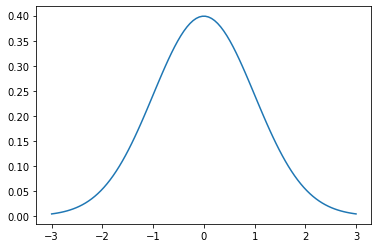

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [75]:
def draw_gaussian_at(support, x_label, y_label, y_label_two, init_val, sd=1.0, height=1.0, 
        xpos=0.0, ypos=0.0, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
        
    
    #ax2 = ax.twinx()
    ax.axhline(y=init_val, color='r', markersize=3.0)
    gaussian = np.exp((-support ** 2.0) / (2 * sd ** 2.0))
    gaussian /= gaussian.max()
    gaussian *= height
    ax.plot(gaussian + xpos, support + ypos, **kwargs)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    #ax2.set_ylabel(y_label_two)
    ax.plot(height, ypos, marker='o', label='mean', **kwargs)
    ax.legend(prop={'size': 12})

In [50]:
from bandits.m_arm_bandit import MultiArmBandit

NUM_BANDITS = 5

BANDIT_SAMPLING_MEAN = 0
BANDIT_SAMPLING_STD_DEV = 1

BANDIT_STD_DEV = 1
BANDIT_INIT_VAL = 0.0

STEP_SIZE = None
INIT_VAL = 0

m_arm_bandit = MultiArmBandit(NUM_BANDITS, BANDIT_SAMPLING_MEAN, BANDIT_SAMPLING_STD_DEV, BANDIT_STD_DEV, STEP_SIZE, INIT_VAL)

m_arm_bandit.init_bandits()

In [51]:
import random

def return_random_color_hexstring():
    r = lambda: random.randint(0,255)
    str1= '#%02X%02X%02X' % (r(),r(),r())

    return str1

In [52]:
for i in range(NUM_BANDITS):
    print(m_arm_bandit.get_bandit(i).get_mean())

0.3480230251335833
0.1039377986829761
-0.4700908803079627
0.3379343199185169
0.6411159224908277


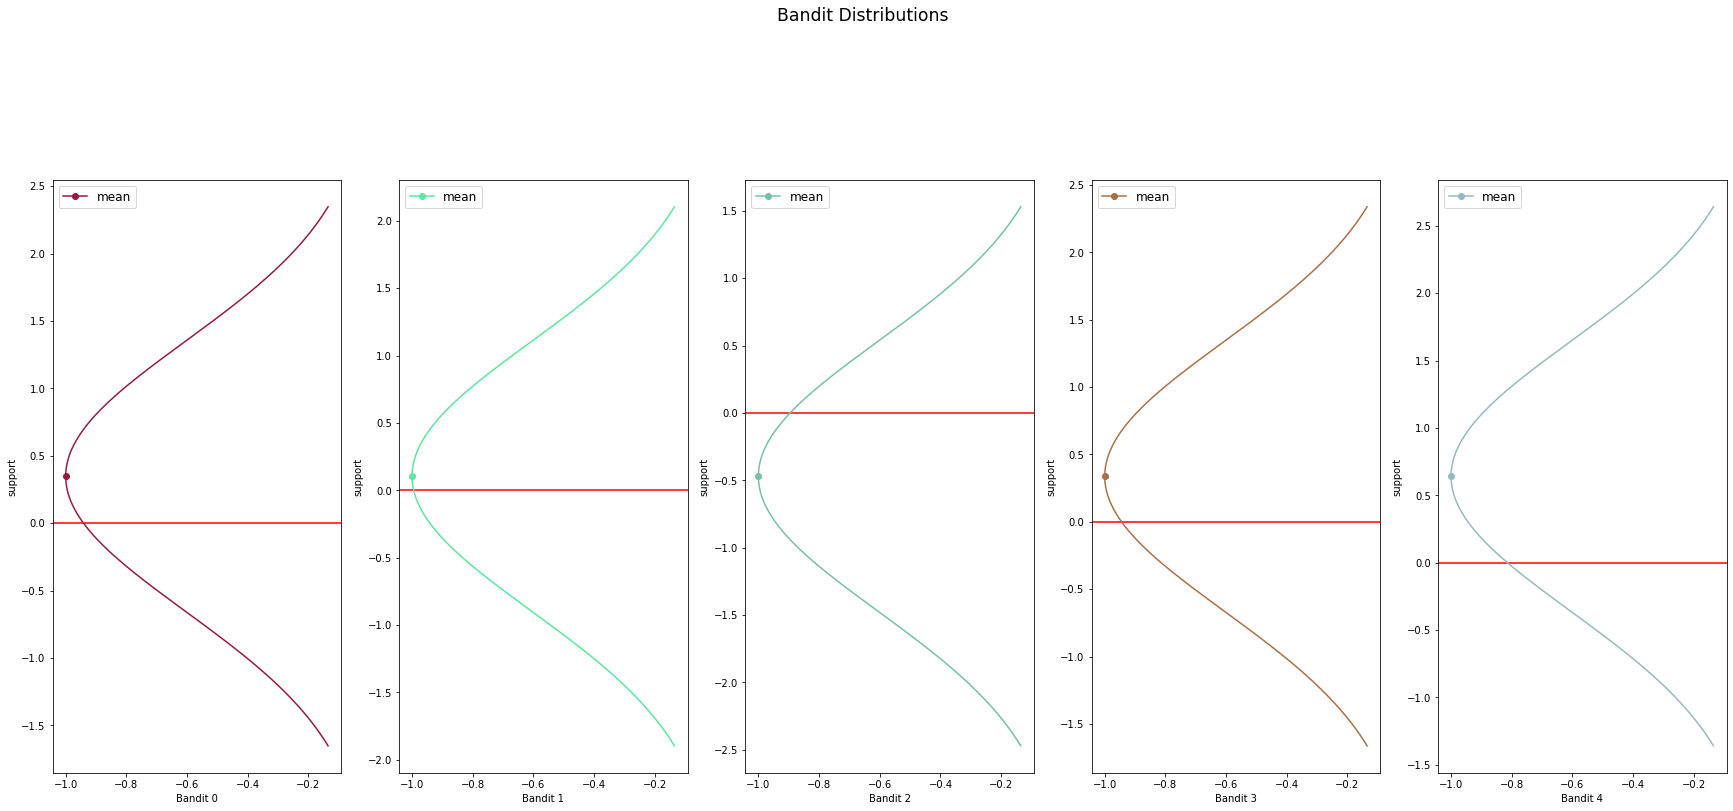

In [76]:
N_BANDITS = len(m_arm_bandit.bandit_list)
cols = 5
support = np.linspace(-2, 2, 1000)
rows = max(math.ceil(N_BANDITS/cols), 2)

BASE_FIGSIZE = 30
row_col_ratio = rows/cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(BASE_FIGSIZE, BASE_FIGSIZE * row_col_ratio * 2))
fig.suptitle("Bandit Distributions", fontsize='xx-large')

bandit_idx = 0
bandit_to_color_dict = {}
bandit_to_axes_dict = {}

for i in range(rows):
    for j in range(cols):
        if bandit_idx < N_BANDITS:
            axes[i, j].grid(False)

            gaussian_color = return_random_color_hexstring()
            bandit_to_color_dict[bandit_idx] = gaussian_color
            bandit_to_axes_dict[bandit_idx] = axes[i, j]

            draw_gaussian_at(support, "Bandit {}".format(bandit_idx), "support", "value estimate", INIT_VAL, sd=1, height=-1, xpos=0, ypos=m_arm_bandit.get_bandit(bandit_idx).get_mean(), ax=axes[i,j], color=gaussian_color)

            bandit_idx += 1
        else:
            fig.delaxes(axes[i][j])

In [7]:
from agents.greedy_agent import GreedyAgent
grd_agent = GreedyAgent(m_arm_bandit)



In [31]:
bdt_idx = grd_agent._GreedyAgent__find_bandit_greedily()
print(bdt_idx)
grd_agent.take_action()
print([x.get_estimate() for x in m_arm_bandit.get_bandits()])

3
[-2.428650360360743, -0.7187290460416869, -0.8050019656908649, 1.7838560889364223, 0, 0, 0, 0, 0, 0]


In [36]:
_.get_estimate()

0

In [45]:
list_of_bandits = m_arm_bandit.get_bandits() 
sorted(range(len(list_of_bandits)), key=lambda k : list_of_bandits[k].get_estimate(), reverse=True)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]